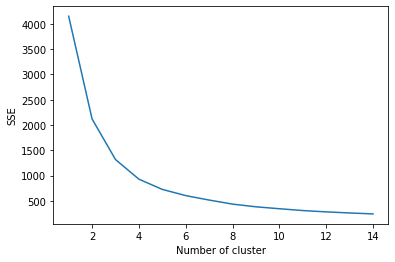

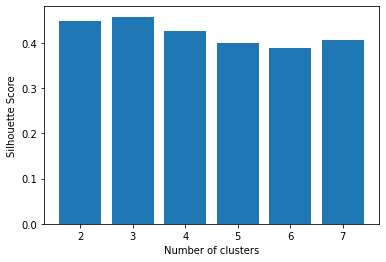

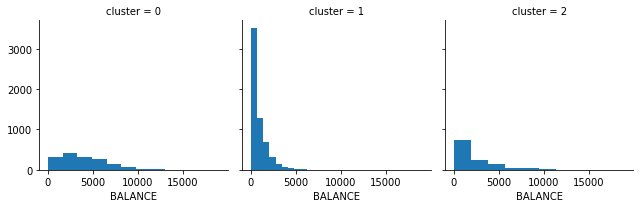

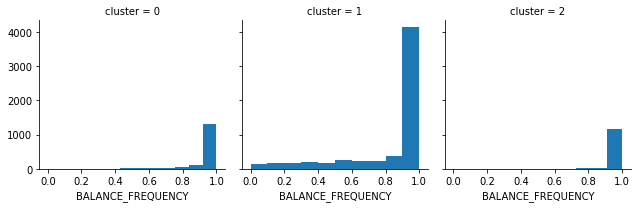

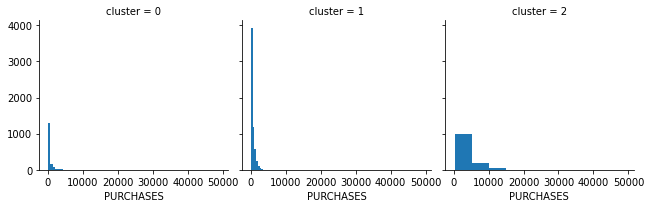

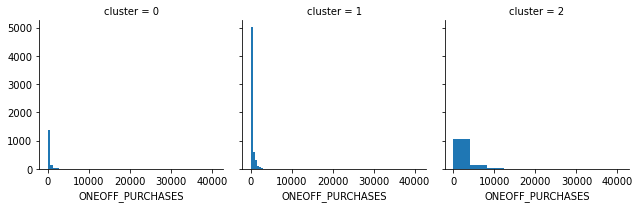

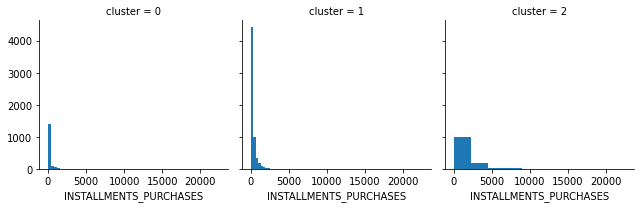

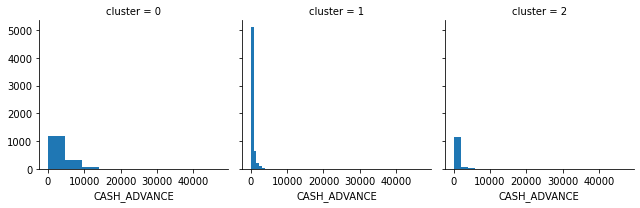

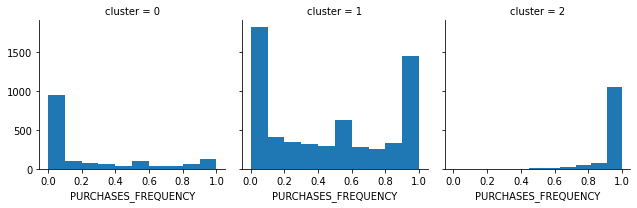

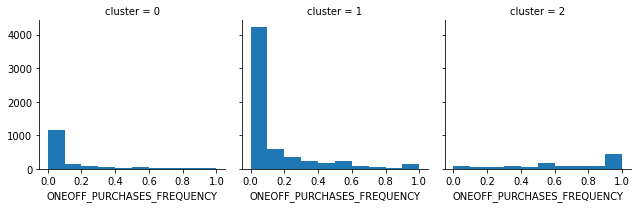

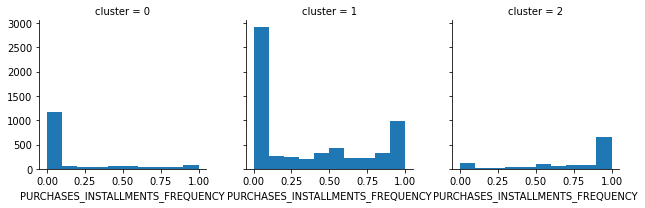

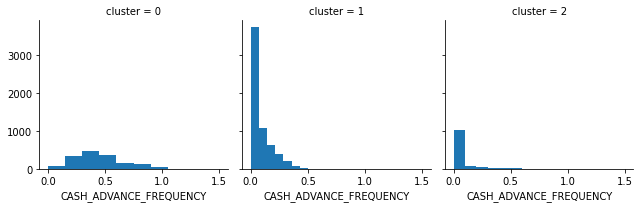

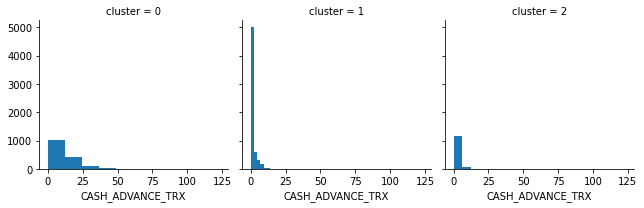

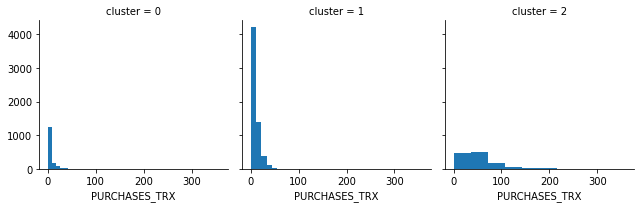

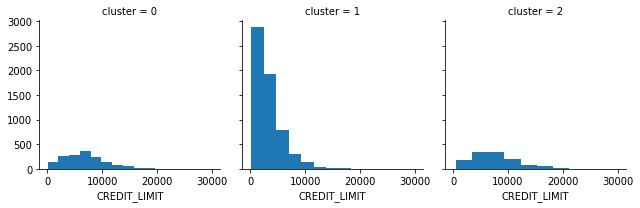

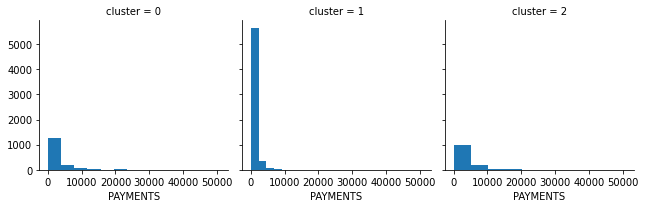

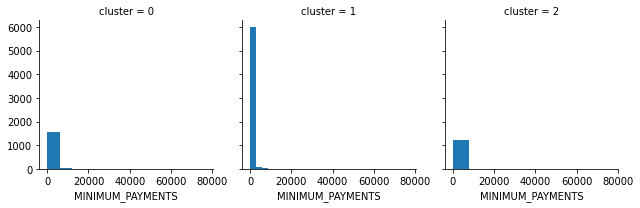

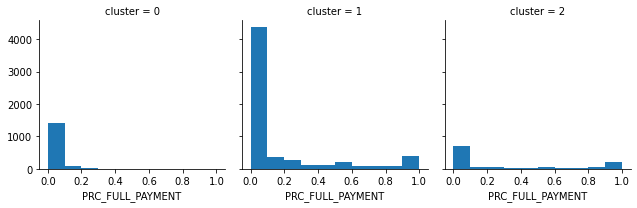

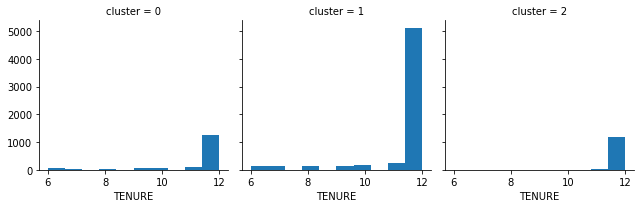

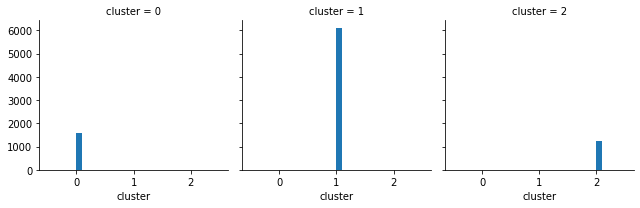

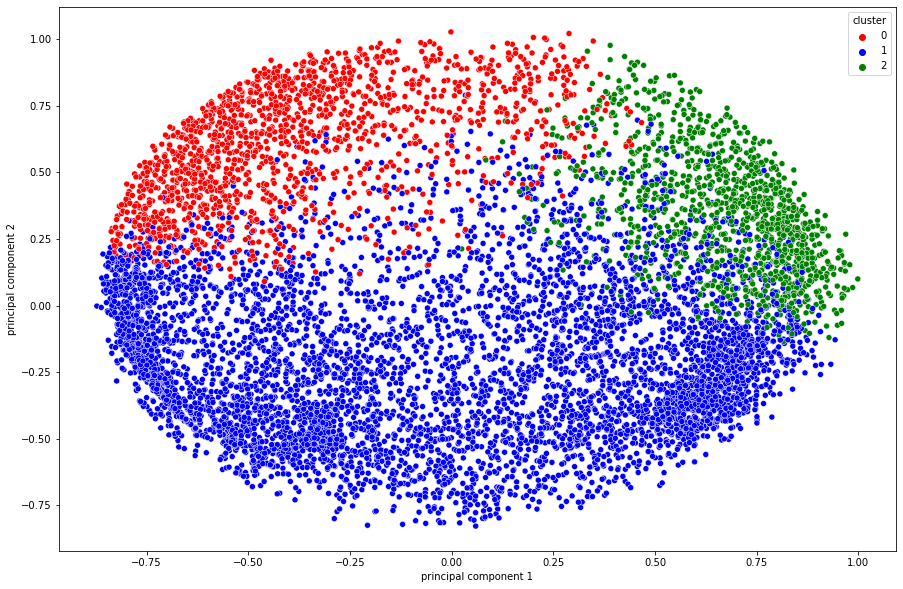

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
df_cc = pd.read_csv('CC GENERAL.csv')
df_cc.head()
df_cc.columns
df_cc.shape
df_cc.describe()
df_cc.isnull().sum()
df_cc['CREDIT_LIMIT'].fillna(df_cc['CREDIT_LIMIT'].mean(), inplace=True)
df_cc['MINIMUM_PAYMENTS'].fillna(df_cc['MINIMUM_PAYMENTS'].mean(), inplace=True)
df_cc.isnull().sum()
df_cc.drop('CUST_ID', axis=1, inplace=True)
df_cc.head(1)
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(df_cc)
normalized_df = normalize(scaled_df) 
normalized_df = pd.DataFrame(normalized_df) 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
X_principal.head(2)
sse = {}
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_principal)
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()
silhouette_scores = []

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(X_principal, KMeans(n_clusters = n_cluster).fit_predict(X_principal))) 
    k = [2, 3, 4, 5, 6, 7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 
kmean= KMeans(3)
kmean.fit(scaled_df)
labels=kmean.labels_
clusters=pd.concat([df_cc, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)
    clusters['cluster'].value_counts()
clusters.groupby('cluster').mean()
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(normalized_df)
principalDf = pd.DataFrame(data = principalComponents, columns=['principal component 1', 'principal component 2'])
principalDf.head(2)
finalDf = pd.concat([principalDf, pd.DataFrame({'cluster':labels})], axis = 1)
finalDf.head()
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x="principal component 1", y="principal component 2", hue="cluster", data=finalDf,palette=['red','blue','green'])
plt.show()